<a href="https://colab.research.google.com/github/Akshat13shah/STT_Ai_Assignment6/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS203 Lab 6

### Team Number: 18
* Name: Paras Prashant Shirvale
* Roll No: 23110232
---
* Name: Akshat Shah
* Roll No: 23110293
---

In [1]:
!pip install tensorflow

In [2]:
!pip install seaborn

In [ ]:
!pip install wandb

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [4]:
# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target.reshape(-1, 1)

In [5]:
# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

In [6]:
# Split the dataset into training, validation, and test sets (70%, 10%, 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/8, random_state=42)

In [7]:
# Normalize the feature values to the range [0,1]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [8]:
# Step 4: Define MLP Model
model = models.Sequential([
    layers.InputLayer(input_shape=(4,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
import wandb

In [11]:
# Step 6: Set up W&B for experiment tracking
wandb.init(project="mlp-iris", config={
    "learning_rate": 0.001,
    "batch_size": 32,
    "epochs": 50
})

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: akshat13 (akshat13-indian-institute-of-technology-gandhinagar) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


In [12]:
# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 469ms/step - accuracy: 0.1606 - loss: 1.2908 - val_accuracy: 0.3333 - val_loss: 1.2158
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2251 - loss: 1.2206 - val_accuracy: 0.3333 - val_loss: 1.1879
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2896 - loss: 1.1738 - val_accuracy: 0.3333 - val_loss: 1.1612
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3299 - loss: 1.1868 - val_accuracy: 0.4000 - val_loss: 1.1352
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4270 - loss: 1.1225 - val_accuracy: 0.4667 - val_loss: 1.1110
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4974 - loss: 1.0911 - val_accuracy: 0.4667 - val_loss: 1.0886
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5068 - loss: 1.0468 - val_accuracy: 0.4667 - val_loss: 1.0667
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4943 - loss: 1.0341 - val_accuracy: 0.4667 - val_loss: 1.0453

In [13]:
# Step 8: Evaluate the model on the test set
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


In [14]:
# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

In [15]:
wandb.init(project="STT_AI_Lab_06", config={"epochs": 10, "batch_size": 32})

In [16]:
# Log the metrics to W&B
wandb.log({
    "test_accuracy": accuracy,
    "test_precision": precision,
    "test_recall": recall,
    "test_f1": f1
})

In [17]:
# Print metrics and confusion matrix
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")

Test Accuracy: 0.9333
Test Precision: 0.9436
Test Recall: 0.9333
Test F1-Score: 0.9319


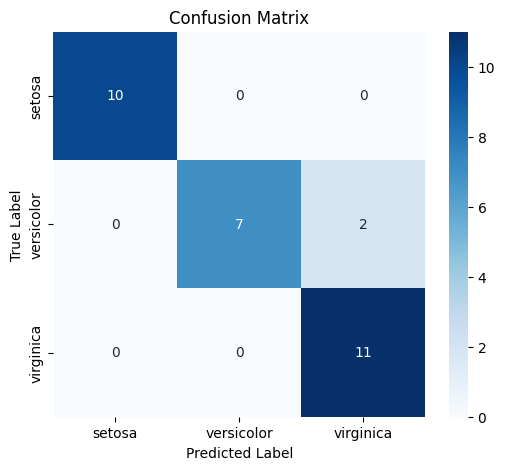

In [18]:
import seaborn as sns

# Step 1: Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

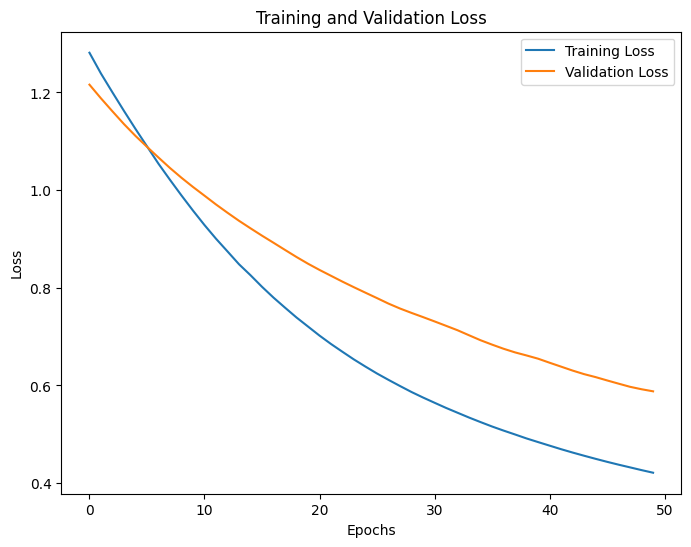

In [19]:
# Step 2: Loss Curve Visualization
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
wandb.finish()

test_accuracy,▁
test_f1,▁
test_precision,▁
test_recall,▁
test_accuracy,0.93333
test_f1,0.93194
test_precision,0.94359
test_recall,0.93333


## Section 2: Hyperparameters
This section aims to perform a hyperparameter search to improve the performance of a custom model that distinguishes between any two classes (positive/negative or anything).


In [25]:
import itertools
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

results = {}

for batch_size, learning_rate, epochs in itertools.product(batch_sizes, learning_rates, epochs_list):
    # Reinitialize the model to avoid reusing trained weights
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    acc, f1, y_true, y_pred = model(model, batch_size, learning_rate, epochs)
    key = f"Batch: {batch_size}, LR: {learning_rate}, Epochs: {epochs}"
    results[key] = (acc, f1, y_true, y_pred)
    print(f"{key} -> Accuracy: {acc:.4f}, F1-score: {f1:.4f}")


ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: <Sequential name=sequential_2, built=True> (of type <class 'keras.src.models.sequential.Sequential'>)